## 데이터셋 확인 및 전처리

In [1]:
cd /aiffel/aiffel/NLP/KoChatGPT/colossalai_ChatGPT_230319 # 경로 문제를 해결하기 위해 변경

/aiffel/aiffel/NLP/KoChatGPT/colossalai_ChatGPT_230319


In [2]:
# !pip install pillow==8.3.2


In [3]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import pandas as pd
import numpy as np

device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "skt/kogpt2-base-v2" # skt/ko-gpt-trinity-1.2B-v0.5로 found model 변경 # skt/kogpt2-base-v2
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name).to(device)

In [4]:
# # model quantizer
# model_name = "skt/ko-gpt-trinity-1.2B-v0.5"

# # load and preprocess data
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer.padding_side = "left"     # Allow batched inference
# train_data, val_data = load_and_preprocess_data(train_args, tokenizer)

# # load model and finetune
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
#     bnb_4bit_compute_dtype=torch.bfloat16
# )

# model = AutoModelForCausalLM.from_pretrained(
#     train_args.base_model,
#     quantization_config=bnb_config,
#     device_map={"":0},
# )

# model.gradient_checkpointing_enable()
# model = prepare_model_for_kbit_training(model)

# lora_config = LoraConfig(
#     r=train_args.lora_r,
#     lora_alpha=train_args.lora_alpha,
#     target_modules=train_args.lora_target_modules,
#     lora_dropout=train_args.lora_dropout,
#     bias="none",
#     task_type="CAUSAL_LM",
# )

# model = get_peft_model(model, lora_config)

In [5]:
tokenizer.max_model_input_sizes

{'gpt2': 1024,
 'gpt2-medium': 1024,
 'gpt2-large': 1024,
 'gpt2-xl': 1024,
 'distilgpt2': 1024}

In [6]:
import json
data_path_1_SFT = '/aiffel/aiffel/NLP/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl'
with open(data_path_1_SFT, 'r', encoding='utf-8-sig') as json_file:
    list_data_dict_1 = json.load(json_file)
     # 토큰을 따로 뽑아서 평균값 보는 작업
print(len(list_data_dict_1))
list_data_dict_1[:3]

12000


[{'prompt': '불고기용 고기 한우에요?',
  'completion': "'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.",
  'tokens': 193},
 {'prompt': '쓰던 앱이 유료로 전환됐어',
  'completion': "'어떤 앱인지 모르기 때문에 정확한 답변을 드리기 어렵습니다. 하지만, 일반적으로 유료 전환된 앱은 기존 무료 앱에서 추가적인 기능이나 서비스를 제공하는 경우가 많습니다. 이 경우, 유료 전환 이전 가격이 매우 저렴하거나 무료인 경우가 많으므로, 앱을 계속 사용하려면 추가적인 비용을 지불해야 할 수 있습니다. 하지만, 유료 전환 이후에는 기존 사용자 또는 새로운 사용자 모두가 추가 기능과 높은 품질의 서비스를 이용할 수 있게 됩니다. 따라서, 앱 개발자는 유료 모델로 전환함으로써 앱의 수익을 증가시키고 더 나은 서비스를 제공할 수 있습니다.",
  'tokens': 288},
 {'prompt': '여친이랑 다툼',
  'completion': "'저는 인공지능이기 때문에 여친과의 다툼에 대해서는 조언을 드릴 수는 없습니다. 하지만 다투게 되면 상대방의 말을 경청하는 태도와 서로의 감정을 존중하는 것이 중요합니다. 논리적이고 차분한 대화를 통해 문제를 해결해보세요. 그리고 서로를 이해하고 서로의 의견을 수용하는 것이 중요합니다.",
  'tokens': 153}]

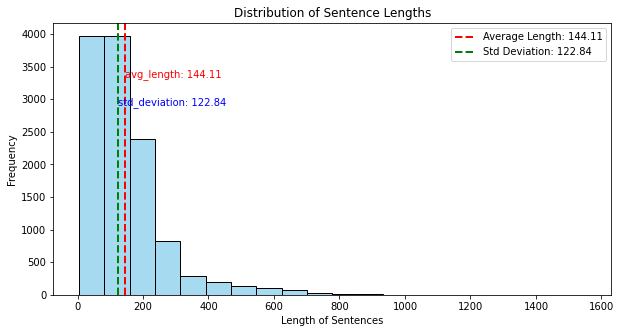

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 데이터 전처리
corpus = [item['completion'] for item in list_data_dict_1]

# 문장의 길이 평균 계산
avg_length = sum(len(sentence) for sentence in corpus) / len(corpus)

# 문장의 길이 표준 편차
std_deviation = np.std([len(sentence) for sentence in corpus])

# 길이 분포 분석
lengths = [len(sentence) for sentence in corpus]
plt.figure(figsize=(10,5))
sns.histplot(lengths, bins=20, color='skyblue')
plt.axvline(avg_length, color='red', linestyle='dashed', linewidth=2, label=f'Average Length: {avg_length:.2f}')
plt.text(avg_length, plt.gca().get_ylim()[1]*0.8, f'avg_length: {avg_length:.2f}', color='red', ha='left')

plt.axvline(std_deviation, color='green', linestyle='dashed', linewidth=2, label=f'Std Deviation: {std_deviation:.2f}')
plt.text(std_deviation, plt.gca().get_ylim()[1]*0.7, f'std_deviation: {std_deviation:.2f}', color='blue', ha='left')

plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [8]:
# 문장의 완성도 분석
# 완성도는 주관적인 척도이므로 여기서는 문장의 마침표의 유무로 간단하게 판단
complete_sentences = [sentence for sentence in corpus if sentence.endswith('.')]
incomplete_sentences = [sentence for sentence in corpus if not sentence.endswith('.')]
complete_ratio = len(complete_sentences) / len(corpus)
incomplete_ratio = len(incomplete_sentences) / len(corpus)

print(f'Complete sentences ratio: {complete_ratio:.2f}')
print(f'Incomplete sentences ratio: {incomplete_ratio:.2f}')

Complete sentences ratio: 0.89
Incomplete sentences ratio: 0.11


In [9]:
data_path_2_RM = '/aiffel/aiffel/NLP/KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl'
with open(data_path_2_RM, 'r', encoding='utf-8-sig') as json_file:
    list_data_dict_2 = json.load(json_file)
    
print(len(list_data_dict_2))
list_data_dict_2[:3]

10220


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?',
  'completion_0': 'Allow me to answer your question. I know that you are curious about me.',
  'completion_1': '번디는 다양한 인터뷰자들과 뉴스홍보 담당자들과의 면담 때 밝혔다.',
  'completion_2': '라이언에게 말했다.',
  'ranking': [2, 1, 0]},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?',
  'completion_0': '개포주공아파트는 다섯 단지로 이루어져 있습니다.',
  'completion_1': '이날 목송에서 구글상위노',
  'completion_2': '개포주공아파트는 총 27개 단지로 이루어져 있습니다.',
  'ranking': [2, 0, 1]},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?',
  'completion_0': 'The diameter of the Metallic domain is bigger than the Hyperonic domain.',
  'completion_1': '이 질문은 조금 불분명합니다. 김영삼 대통령이 후보 시절에 어떤 발언을 했고, 누가 그 발언을 문제삼았는지에 따라 답이 다를 수 있습니다.\\n\\n만약 김영삼 대통령이 후보 시절에 지역표심을 겨냥한 발언을 했다는 가정하에, 그 발언을 문제삼은 후보가 누구였는지를 대답하자면, 그 답은 이화선 당시 민주당 대통령 후보가 될 것입니다. 1992년 총선 때, 김영삼 대선후보는 "집값이 오른 노량진역 부근의 부동산 가격은 세월호 폭침 후 \\\'강남 도시재생\\\' 일환으로 상승했다"는 발언을 했습니다. 하지만 이화선 후보는 이 발언을 "전국적으로 경제적 발전이 이루어지지 않은 지방민의 마음을 멀리해지려는 무례한 발언"이라고 비판하며 문

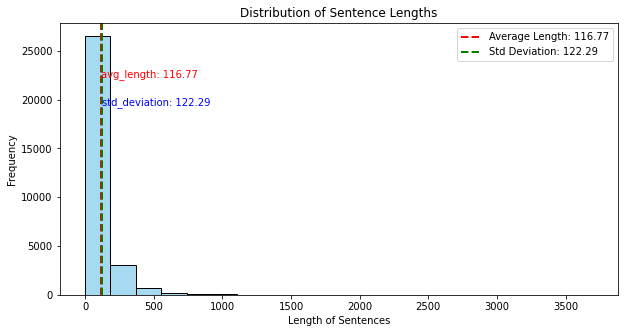

In [13]:
# 모든 완성 문장을 하나의 리스트로 펼치기
corpus = []
for item in list_data_dict_2:
    for i in range(3):  # completion0, completion1, completion2
        if f'completion_{i}' in item:
            corpus.append(item[f'completion_{i}'])

# 문장의 길이 평균 계산
avg_length = sum(len(sentence) for sentence in corpus) / len(corpus)

# 문장의 길이 표준 편차
std_deviation = np.std([len(sentence) for sentence in corpus])

# 길이 분포 분석
lengths = [len(sentence) for sentence in corpus]
plt.figure(figsize=(10,5))
sns.histplot(lengths, bins=20, color='skyblue')
plt.axvline(avg_length, color='red', linestyle='dashed', linewidth=2, label=f'Average Length: {avg_length:.2f}')
plt.text(avg_length, plt.gca().get_ylim()[1]*0.8, f'avg_length: {avg_length:.2f}', color='red', ha='left')

plt.axvline(std_deviation, color='green', linestyle='dashed', linewidth=2, label=f'Std Deviation: {std_deviation:.2f}')
plt.text(std_deviation, plt.gca().get_ylim()[1]*0.7, f'std_deviation: {std_deviation:.2f}', color='blue', ha='left')

plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [14]:
data_path_3_PPO = '/aiffel/aiffel/NLP/KoChatGPT/data_kochatgpt/kochatgpt_3_PPO.jsonl'
with open(data_path_3_PPO, 'r', encoding='utf-8-sig') as json_file:
    list_data_dict_3 = json.load(json_file)
    
print(len(list_data_dict_3))
list_data_dict_3[:3]

12000


[{'prompt': '번디는 자신이 탐정잡지, 범죄소설 그리고 성범죄 관련 실제 범죄 다큐멘터리들을 탐독했다고 누구에게 말했나?'},
 {'prompt': '개포주공아파트는 몇 단지로 이루어져 있나?'},
 {'prompt': '김영삼의 후보 시절 지역표심을 겨냥한 발언을 문제삼은 후보는?'}]

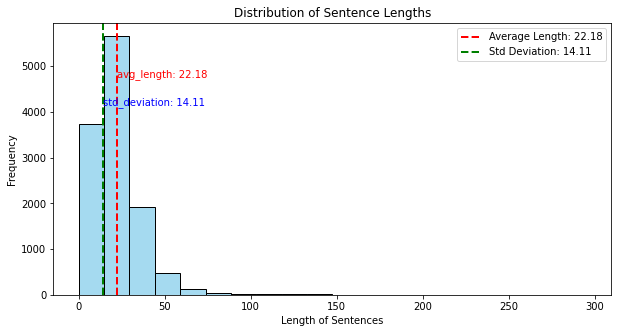

In [15]:
# 데이터 전처리
corpus = [item['prompt'] for item in list_data_dict_3]

# 문장의 길이 평균 계산
avg_length = sum(len(sentence) for sentence in corpus) / len(corpus)

# 문장의 길이 표준 편차
std_deviation = np.std([len(sentence) for sentence in corpus])

# 길이 분포 분석
lengths = [len(sentence) for sentence in corpus]
plt.figure(figsize=(10,5))
sns.histplot(lengths, bins=20, color='skyblue')
plt.axvline(avg_length, color='red', linestyle='dashed', linewidth=2, label=f'Average Length: {avg_length:.2f}')
plt.text(avg_length, plt.gca().get_ylim()[1]*0.8, f'avg_length: {avg_length:.2f}', color='red', ha='left')

plt.axvline(std_deviation, color='green', linestyle='dashed', linewidth=2, label=f'Std Deviation: {std_deviation:.2f}')
plt.text(std_deviation, plt.gca().get_ylim()[1]*0.7, f'std_deviation: {std_deviation:.2f}', color='blue', ha='left')

plt.title('Distribution of Sentence Lengths')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

기존 모델에서 data_path_3_PPO 있는 문장을 넣어 출력되는 데이터 확인

In [16]:
# 디코딩 성능 확인

max_length=144
# prompt를 리스트에 담기
prompts = [list_data_dict_1[0]['prompt']]

# prompts를 사용하여 토크나이저에 전달
input_ids = tokenizer(prompts, return_tensors="pt", padding=True, truncation=True)["input_ids"].to(device)

# 나머지 코드는 그대로 유지
output_greedy = model.generate(input_ids, max_length=max_length, do_sample=False)
print(tokenizer.decode(output_greedy[0]))

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


불고기용 고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜요?" "고기 한우에요?" "네." "근데 왜


In [ ]:
#q-beam, top_k, top_p

In [17]:
# 메모리 관리를 위한 캐시 비우기
torch.cuda.empty_cache()

In [18]:
import gc
del output_greedy, input_ids, model , tokenizer
gc.collect()

46

### SFT

In [19]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim import Adam
from datasets import load_dataset
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from transformers import Trainer, TrainingArguments
from copy import deepcopy
import copy
import logging
import json
from dataclasses import dataclass

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [5]:
# !pip install pillow==5.3 # 8.3.2

     |████████████████████████████████| 15.6 MB 5.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pillow: filename=Pillow-5.3.0-cp39-cp39-linux_x86_64.whl size=495662 sha256=ab07f4736028eb4e5fe5e7d8e9a89318ea331f1c04ccab79d25bf6e9f6a232af
  Stored in directory: /aiffel/.cache/pip/wheels/67/fc/36/d4f512254f64d51dd2718711f345cca21e04009e5ed0e159a8
Successfully built pillow
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.3.0
    Uninstalling Pillow-8.3.0:
      Successfully uninstalled Pillow-8.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
matplotlib 3.4.3 requires pillow>=6.2.0, but you have pillow 5.3.0 which is incompatible.


In [6]:
# !pip install peft

     |████████████████████████████████| 199 kB 7.3 MB/s            
     |████████████████████████████████| 755.5 MB 8.8 kB/s             
     |████████████████████████████████| 290 kB 66.2 MB/s            
     |████████████████████████████████| 1.3 MB 62.9 MB/s            
     |████████████████████████████████| 388 kB 63.0 MB/s            
     |████████████████████████████████| 171 kB 92.6 MB/s            
     |████████████████████████████████| 56.5 MB 83 kB/s              
     |████████████████████████████████| 166.0 MB 40 kB/s              
     |████████████████████████████████| 167.9 MB 31 kB/s              
     |████████████████████████████████| 5.7 MB 83.7 MB/s            
     |████████████████████████████████| 121.6 MB 16 kB/s              
     |████████████████████████████████| 99 kB 145 kB/s            
     |████████████████████████████████| 14.1 MB 91.0 MB/s            
     |████████████████████████████████| 823 kB 94.2 MB/s            
     |█████████████████████

In [13]:
# from transformers import BitsAndBytesConfig
# from peft import prepare_model_for_kbit_training, LoraConfig, get_peft_model

# tokenizer = AutoTokenizer.from_pretrained(model_name,
#                                          model_max_length=122)
# tokenizer.pad_token = tokenizer.eos_token
# tokenizer.padding_side = "right"     # Allow batched inference

# # load model and finetune
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_use_double_quant=True,
#     bnb_4bit_quant_type="nf4",
# #     bnb_4bit_compute_dtype=torch.bfloat16
# )

# model = AutoModelForCausalLM.from_pretrained(
#     model_name,
#     quantization_config=bnb_config,
#     device_map={"":0},
# )

# model.gradient_checkpointing_enable()
# model = prepare_model_for_kbit_training(model_name)

# lora_config = LoraConfig(
#     r=train_args.lora_r,
#     lora_alpha=train_args.lora_alpha,
#     target_modules=train_args.lora_target_modules,
#     lora_dropout=train_args.lora_dropout,
#     bias="none",
#     task_type="CAUSAL_LM",
# )

# model = get_peft_model(model, lora_config)


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so
/opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32
CUDA SETUP: Loading binary /opt/conda/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so...


/opt/conda/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


RuntimeError: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver.

In [21]:
# import torch
# print(torch.__version__)


2.2.2+cu121


In [20]:
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(
    model_name, bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=max_length, #512 -> 122 평균 길이로 변경
)
print(tokenizer)

GPT2TokenizerFast(name_or_path='skt/ko-gpt-trinity-1.2B-v0.5', vocab_size=51200, model_max_length=144, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '</s>', 'eos_token': '</s>', 'unk_token': '</s>', 'pad_token': '</s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True)


In [15]:
# 메모리 관리를 위한 캐시 비우기
torch.cuda.empty_cache()

In [21]:
from typing import Optional, Dict, Sequence

class SFT_dataset(Dataset):

    def __init__(self, data_path_1_SFT: str, tokenizer: transformers.PreTrainedTokenizer, verbose=False):
        super(SFT_dataset, self).__init__()
        logging.warning("Loading data...")

        pattern_instruction = 'prompt'  # instruction
        pattern_output = 'completion'  # response

        with open(data_path_1_SFT, "r", encoding='utf-8-sig') as json_file:
            list_data_dict = json.load(json_file)

        PROMPT_DICT = {
            "prompt_input": (
                "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
            )
        }

        prompt_input = PROMPT_DICT["prompt_input"]

        sources = []
        for example in list_data_dict:
            tmp = prompt_input.format_map(example)
            sources.append(tmp)

        targets = []
        for example in list_data_dict:
            targets.append(f"{example[pattern_output]}{tokenizer.eos_token}")
        examples = [s + t for s, t in zip(sources, targets)]

        sources_tokenized = self._tokenize_fn(sources, tokenizer)  # source
        examples_tokenized = self._tokenize_fn(examples, tokenizer)  # source + target

        input_ids = examples_tokenized["input_ids"]
        labels = copy.deepcopy(input_ids)
        for label, source_len in zip(labels, sources_tokenized["input_ids_lens"]):
            label[:source_len] = -100

        data_dict = dict(input_ids=input_ids, labels=labels)

        self.input_ids = data_dict["input_ids"]
        self.labels = data_dict["labels"]
        logging.warning("Loading data done!!: %d"%(len(self.labels)))


    def _tokenize_fn(self, strings: Sequence[str], tokenizer: transformers.PreTrainedTokenizer) -> Dict:
        tokenized_list = [
            tokenizer(
                text,
                return_tensors="pt",
                padding="longest",
                max_length=tokenizer.model_max_length,
                truncation=True,
            )
            for text in strings
        ]
        input_ids = labels = [tokenized.input_ids[0] for tokenized in tokenized_list]
        input_ids_lens = labels_lens = [
            tokenized.input_ids.ne(tokenizer.pad_token_id).sum().item() for tokenized in tokenized_list
        ]
        return dict(
            input_ids=input_ids,
            labels=labels,
            input_ids_lens=input_ids_lens,
            labels_lens=labels_lens,
        )


    def __len__(self):
        return len(self.input_ids)


    def __getitem__(self, i) -> Dict[str, torch.Tensor]:
        return dict(input_ids=self.input_ids[i], labels=self.labels[i])

In [22]:
@dataclass
class DataCollatorForSupervisedDataset(object): 

    tokenizer: transformers.PreTrainedTokenizer

    def __call__(self, instances: Sequence[Dict]) -> Dict[str, torch.Tensor]:
        input_ids, labels = tuple([instance[key] for instance in instances] for key in ("input_ids", "labels"))
        input_ids = torch.nn.utils.rnn.pad_sequence(
            input_ids, batch_first=True, padding_value=self.tokenizer.pad_token_id
        )
        labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value= -100)
        return dict(
            input_ids=input_ids,
            labels=labels,
            attention_mask=input_ids.ne(self.tokenizer.pad_token_id),
        )

In [23]:
train_dataset = SFT_dataset(data_path_1_SFT='/aiffel/aiffel/NLP/KoChatGPT/data_kochatgpt/kochatgpt_1_SFT.jsonl', tokenizer=tokenizer)
data_collator = DataCollatorForSupervisedDataset(tokenizer=tokenizer)

print('input : %s'%train_dataset.input_ids[0])
print('output: %s'%train_dataset.labels[0])

input : tensor([30132, 42872, 33313, 30679, 40479, 39911,   384, 22509, 21921, 25372,
          385, 31245, 23280, 34957, 25617, 36539, 29991, 25624, 25400, 31167,
          376, 42872,   379, 46803,   456, 30303, 35353,   384, 25785, 20573,
        37780,   383, 46900, 43226,   565, 27071, 23151, 31555, 41690, 35071,
        25400, 31269, 32677, 30765, 31810, 36229, 30326, 33889, 30093, 34957,
        25617, 30021, 30434, 29991, 39687, 34036, 19016, 31997, 49906, 19352,
        30011, 30904, 36731, 43502, 30228, 31214, 30326, 29991, 31621, 33314,
        34347, 30843, 50342, 33512, 31370, 34243, 29991, 35144, 32586, 32622,
        44680, 30110, 21844, 39826, 34803, 31356, 39075, 30242, 36966, 29985,
        34179, 36513, 30718, 35557, 32361, 31018, 29404, 35942, 19352, 41049,
            1])
output: tensor([ -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -1

In [24]:
decoded_text = tokenizer.decode(train_dataset.input_ids[0].tolist(), skip_special_tokens=True)
print(decoded_text)


### Instruction(명령어):
불고기용 고기 한우에요?

### Response(응답):'저는 인공지능 챗봇이며, 직접적으로 식품에 관한 정보를 가지고 있지 않습니다. 하지만 일반적으로 불고기용 고기는 한우, 쇠고기, 돼지고기 등 다양한 종류의 고기를 사용합니다. 하지만 한우는 대표적인 고급 육류로 알려져 있기 때문에, 한우를 사용하는 경우도 많습니다. 알러지나 개별 건강 상태에 따라 다를 수 있으니 충분한 정보 수집 후에 선택해 주시기 바랍니다.


기존 모델의 결과물은 
반복적인 말만 출력했었는데

SFT를 적용한 모델의 결과물은
말이되는 문장으로 출력이 되어서 나왔다.

In [24]:
training_args = TrainingArguments(
    output_dir="/aiffel/aiffel/NLP/KoChatGPT/test_2",
    overwrite_output_dir=True,
    num_train_epochs=1,
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    warmup_steps=5,
    prediction_loss_only=True,
    fp16 = True
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset
)

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:14                                                                                   │
│                                                                                                  │
│   11 │   fp16 = True                                                                             │
│   12 │   )                                                                                       │
│   13                                                                                             │
│ ❱ 14 trainer = lora.get_Trainer(                                                                 │
│   15 │   model=model,                                                                            │
│   16 │   args=training_args,                                                                     │
│   17 │   data_collator=data_collator,                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
AttributeError: module 'loralib' has no attribute 'get_Trainer'

In [16]:
trainer.train()
model.save_pretrained('/aiffel/aiffel/NLP/KoChatGPT/output_1_SFT_quest')

/opt/conda/lib/python3.9/site-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 trainer.train()                                                                              │
│   2 model.save_pretrained('/aiffel/aiffel/NLP/KoChatGPT/output_1_SFT_quest')                     │
│   3                                                                                              │
│                                                                                                  │
│ /opt/conda/lib/python3.9/site-packages/transformers/trainer.py:1662 in train                     │
│                                                                                                  │
│   1659 │   │   inner_training_loop = find_executable_batch_size(                                 │
│   1660 │   │   │   self._inner_training_loop, self._train_batch_size, args.auto_find_batch_size  │
│   1661 │   │   )                                                                                 │
│ ❱ 1662 │   │   return inner_training_loop(                                                       │
│   1663 │   │   │   args=args,                                                                    │
│   1664 │   │   │   resume_from_checkpoint=resume_from_checkpoint,                                │
│   1665 │   │   │   trial=trial,                                                                  │
│                                                                                                  │
│ /opt/conda/lib/python3.9/site-packages/transformers/trainer.py:1991 in _inner_training_loop      │
│                                                                                                  │
│   1988 │   │   │   │   │   │   │   xm.optimizer_step(self.optimizer)                             │
│   1989 │   │   │   │   │   elif self.do_grad_scaling:                                            │
│   1990 │   │   │   │   │   │   scale_before = self.scaler.get_scale()                            │
│ ❱ 1991 │   │   │   │   │   │   self.scaler.step(self.optimizer)                                  │
│   1992 │   │   │   │   │   │   self.scaler.update()                                              │
│   1993 │   │   │   │   │   │   scale_after = self.scaler.get_scale()                             │
│   1994 │   │   │   │   │   │   optimizer_was_run = scale_before <= scale_after                   │
│                                                                                                  │
│ /opt/conda/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:338 in step                 │
│                                                                                                  │
│   335 │   │                                                                                      │
│   336 │   │   assert len(optimizer_state["found_inf_per_device"]) > 0, "No inf checks were rec   │
│   337 │   │                                                                                      │
│ ❱ 338 │   │   retval = self._maybe_opt_step(optimizer, optimizer_state, *args, **kwargs)         │
│   339 │   │                                                                                      │
│   340 │   │   optimizer_state["stage"] = OptState.STEPPED                                        │
│   341                                                                                            │
│                                                                                                  │
│ /opt/conda/lib/python3.9/site-packages/torch/cuda/amp/grad_scaler.py:285 in _maybe_opt_step      │
│                                                                                                  │
│   282 │   def _maybe_opt_step(self, optimizer, optimizer_st

In [ ]:
generator = pipeline('text-generation', model='/aiffel/aiffel/NLP/KoChatGPT/output_1_SFT_quest', tokenizer=tokenizer)

generation_args = dict(   
    num_beams=4,
    repetition_penalty=2.0,
    no_repeat_ngram_size=4,
    eos_token_id=375, # \n   
    max_new_tokens=64,
    do_sample=True,
    top_k=50,
    early_stopping=True
)

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = ['불고기용 고기 한우에요?',
               '리처드 닉슨이 43대 부통령직을 수행한 년도는?',
               '시카고 오헤어 국제공항은 어디에 있어?',
               '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt' : tmp}) for tmp in list_prompt]

list_result = generator(list_prompt, **generation_args)   
for prompt, result in zip(list_prompt, list_result):
    print()
    print((result[0]['generated_text']))

In [ ]:
# 메모리 관리를 위한 캐시 비우기
torch.cuda.empty_cache()

### RM

In [ ]:
import os
import json
from typing import Optional
import torch
import torch.nn as nn
from torch.optim import Adam
from chatgpt.dataset import RewardDataset
from chatgpt.models.base import RewardModel
from chatgpt.trainer import RewardModelTrainer
from chatgpt.trainer.strategies import NaiveStrategy
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel, AutoConfig
from transformers.models.gpt2.configuration_gpt2 import GPT2Config
from transformers.models.gpt2.modeling_gpt2 import GPT2Model
import loralib as lora

In [ ]:
class GPTRM_custom(RewardModel):

    def __init__(self,
                 pretrained: Optional[str] = None,
                 config: Optional[GPT2Config] = None,
                 checkpoint: bool = False,
                 lora_rank: int = 0,
                 lora_train_bias: str = 'none',
                 tokenizer=None) -> None:
        if pretrained is not None:
            model = GPT2Model.from_pretrained(pretrained)
            model.resize_token_embeddings(len(tokenizer))
        elif config is not None:
            model = GPT2Model(config)
        else:
            model = GPT2Model(GPT2Config())
        if checkpoint:
            model.gradient_checkpointing_enable()

        value_head = nn.Linear(model.config.n_embd, 1)
        super().__init__(model, value_head, lora_rank, lora_train_bias)

        if pretrained is not None:
            self.model = model
            self.pretrained = pretrained


    def save_pretrained(self, dir):
        if self.pretrained is not None:
            self.model.save_pretrained(dir)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(
    model_name, bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    padding_side="right",
    model_max_length=512,
)

with NaiveStrategy().model_init_context():
        model = GPTRM_custom(pretrained='skt/kogpt2-base-v2', lora_rank=1, tokenizer=tokenizer).cuda()

In [ ]:
with open('/aiffel/aiffel/NLP/KoChatGPT/data_kochatgpt/kochatgpt_2_RM.jsonl', "r", encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)

total_data_ranking2chosen = []
for tmp in list_data_dict:
    one_data_ranking2chosen = []

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][1]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_1']
    else:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][0] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_0']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_0']
    one_data_ranking2chosen.append(data)

    data = {}
    data['prompt'] = tmp['prompt']
    if tmp['ranking'][1] < tmp['ranking'][2]:
        data['chosen'] = tmp['completion_1']
        data['rejected'] = tmp['completion_2']
    else:
        data['chosen'] = tmp['completion_2']
        data['rejected'] = tmp['completion_1']
    one_data_ranking2chosen.append(data)



    total_data_ranking2chosen.extend(one_data_ranking2chosen)

print('before data num: %d'%(len(list_data_dict)))
print('after  data num: %d'%(len(total_data_ranking2chosen)))
print('data example: \n%s'%total_data_ranking2chosen[45])

In [ ]:
import random
random.seed(230319)
random.shuffle(total_data_ranking2chosen)
print(total_data_ranking2chosen[45])

In [ ]:
train_data = total_data_ranking2chosen[:1000] 
eval_data = total_data_ranking2chosen[1000:1200]

print(len(train_data))
print(len(eval_data))

train_dataset = RewardDataset(train_data, tokenizer, 512)
eval_dataset = RewardDataset(eval_data, tokenizer, 512)

In [ ]:
idx = 1
print('#'*70)
print('## prompt ##')
print(train_data[idx]['prompt'])
print('#'*70)
print('## chosen ##')
print(train_data[idx]['chosen'])
print('#'*70)
print('## rejected ##')
print(train_data[idx]['rejected'])

In [ ]:
trainer = RewardModelTrainer(model=model,
                             strategy=NaiveStrategy(),
                             optim=Adam(model.parameters(), lr=5e-5),
                             train_dataset=train_dataset,
                             eval_dataset=eval_dataset,
                             batch_size=4,
                             max_epochs=1)

In [ ]:
trainer.fit(use_lora=0)

model.save_pretrained('/aiffel/aiffel/NLP/KoChatGPT/output_2_RM_quest')

In [ ]:
def inference_RM(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    output = model(input_ids)
    output_reward = output.cpu().detach().numpy()[0]

    print('input: %s\nreward score: %.1f'%(input_text, output_reward))

    return output_reward

input_text = '인공지능은 똥멍청이 입니다'
output_reward = inference_RM(input_text=input_text)

In [ ]:
input_text = "인공지능(AI)은 컴퓨터에서 음성 및 작성된 언어를 보고 이해하고 번역하고 데이터를 분석하고 추천하는 기능을 포함하여 다양한 고급 기능을 수행할 수 있는 일련의 기술입니다. AI는 현대적인 컴퓨팅 혁신에서 중추적인 역할을 하며 개인과 비즈니스의 가치를 창출합니다. 예를 들어 광학 문자 인식(OCR)은 AI를 사용해 이미지 및 문서에서 텍스트 및 데이터를 추출하고, 구조화되지 않은 콘텐츠를 비즈니스에 바로 사용할 수 있게 만들고, 유용한 정보를 창출합니다."

output_reward = inference_RM(input_text=input_text)

In [ ]:
input_text = "인공지능은 일반적으로 인간의 지능이 필요하거나 인간이 분석할 수 있는 것보다 규모가 큰 데이터를 포함하는 방식으로 추론, 학습 및 행동할 수 있는 컴퓨터 및 기계를 구축하는 것과 관련된 과학 분야입니다. AI는 컴퓨터 공학, 데이터 분석 및 통계, 하드웨어 및 소프트웨어 엔지니어링, 언어학, 신경 과학은 물론 철학과 심리학을 포함하여 여러 학문을 포괄하는 광범위한 분야입니다. 비즈니스의 운영 수준에서 AI는 주로 머신러닝과 딥 러닝을 기반으로 하는 기술 모음으로, 데이터 분석, 예상 및 예측, 객체 분류, 자연어 처리, 추천, 지능형 데이터 가져오기 등을 수행할 수 있습니다."

output_reward = inference_RM(input_text=input_text)

In [ ]:
# 메모리 관리를 위한 캐시 비우기
torch.cuda.empty_cache()

### Proximal Policy Optimization (PPO)

In [ ]:
from copy import deepcopy

from chatgpt.models.base import RewardModel
from chatgpt.models.gpt import GPTActor, GPTCritic
from chatgpt.trainer import PPOTrainer
from chatgpt.trainer.strategies import NaiveStrategy

In [ ]:
with NaiveStrategy().model_init_context():
    actor = GPTActor(pretrained='/aiffel/aiffel/NLP/KoChatGPT/output_1_SFT_quest', lora_rank=0)
    critic = GPTActor(pretrained='/aiffel/aiffel/NLP/KoChatGPT/output_2_RM_quest', lora_rank=0)
    
    tokenizer = AutoTokenizer.from_pretrained(
    model_name, bos_token='</s>', eos_token='</s>', unk_token='</s>', pad_token='</s>',
    pdding_side='right',
    model_max_length=512
    )
    
    initial_model = deepcopy(actor)
    reward_model = RewardModel(deepcopy(critic.model), deepcopy(critic.value_head)).to(torch.cuda.current_device())

In [ ]:
actor_optim = Adam(actor.parameters(), lr=5e-6)
critic_optim = Adam(critic.parameters(), lr=5e-6)

In [ ]:
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model = NaiveStrategy().prepare(
(actor, actor_optim), (critic, critic_optim), reward_model, initial_model)

In [ ]:
with open('/aiffel/KoChatGPT/data_kochatgpt/kochatgpt/kochathpt_3_PPO.jsonl', 'r', encoding='utf-8-sig') as json_file:
    list_data_dict = json.load(json_file)
    list_prompt = [tmp['prompt'] for tmp in list_data_dict]
    
def tokenize_fn(texts):
    batch = tokenizer(texts, return_tensors='pt', max_length=96, padding=True, truncation=True)
    return {k: v.cuda() for k, v in batch.itmes()}

In [ ]:
print(tokenize_fn('It takes something more than intelligence to act intelligently.'))

In [ ]:
len(list_prompt)

In [ ]:
trainer = PPOTrainer(NaiverStrategy(),
                    actor,
                    critic,
                    reward_model,
                    initial_model,
                    actor_optim,
                    critic_optim,
                    max_epochs=1,
                    train_batch_size=8,
                    tokenizer=tokenize_fn,
                    max_length=128,
                    do_sample=True,
                    temperatur=1.0,
                    top_k=50,
                    pad_token_id=tokenizer.pad_token_id,
                    eos_token_id=tokenizer.eos_token_id)

In [ ]:
trainer.fit(list_prompt,
           num_episodes=10,
           max_timestpes=3,
           update_timesteps=3)

model.save_pretrained('/aiffel/aiffel/NLP/KoChatGPT/output_3_PPO_quest')

In [ ]:
def generation(input_text):
    input_ids = tokenizer.encode(input_text, return_tensors='pt').to(
        torch.cuda.current_device())
    outputs = actor.generate(input_ids,
                             max_length=250,
                             do_sample=True,
                             top_k=50,
                             top_p=0.95,
                             num_return_sequences=1)
    output = tokenizer.batch_decode(outputs[0], skip_special_tokens=True)[0]
    print()
    print(output)
    return output

PROMPT_DICT = {
    "prompt_input": (
        "### Instruction(명령어):\n{prompt}\n\n### Response(응답):"
    )
}

list_prompt = [
    '불고기용 고기 한우에요?', 
    '리처드 닉슨이 43대 부통령직을 수행한 년도는?', 
    '시카고 오헤어 국제공항은 어디에 있어',
    '오늘 미세먼지 어때?']

list_prompt = [PROMPT_DICT['prompt_input'].format_map({'prompt': tmp}) for tmp in list_prompt]

for input_text in list_prompt:
    output = generation(input_text)

In [ ]:
# bleu

import nltk
from nltk.translate.bleu_score import corpus_bleu

# 모델이 생성한 번역 결과와 참조 번역 결과
candidate_sentences = [
    ['I', 'am', 'going', 'to', 'the', 'park', 'today', '.'],
    ['The', 'cat', 'is', 'on', 'the', 'mat', '.']
]

reference_sentences = [
    [['I', 'am', 'going', 'to', 'the', 'park', 'today', '.'],
     ['I', 'am', 'going', 'to', 'the', 'park', 'today', '.'],
     ['I', 'am', 'going', 'to', 'the', 'park', 'today', '.'],
     ['I', 'am', 'going', 'to', 'the', 'park', 'today', '.']],
    [['The', 'cat', 'is', 'on', 'the', 'mat', '.'],
     ['The', 'cat', 'is', 'sitting', 'on', 'the', 'mat', '.']]
]

# BLEU 계산
bleu_score = corpus_bleu(reference_sentences, candidate_sentences)

print(f"BLEU Score: {bleu_score:.4f}")


In [ ]:
# Rouge
from rouge import Rouge

# 모델이 생성한 요약 결과와 참조 요약 결과
candidate_summary = "The cat is on the mat."
reference_summary = "The cat is sitting on the mat."

# Rouge 계산
rouge = Rouge()
scores = rouge.get_scores(candidate_summary, reference_summary)

print("ROUGE-N: ", scores[0]['rouge-1'])
print("ROUGE-L: ", scores[0]['rouge-l'])
print("ROUGE-W: ", scores[0]['rouge-w'])
